# WCSPP alogrithms benchmarks

In [1]:
import subprocess
import random

In [37]:
algorithms = ("WC_A", "WC_BA", "WC_EBBA")
# name, nodes, arcs
roadmaps = (
    ("NY",  264_346,    733_846),
    ("BAY", 321_270,    800_172),
    ("COL", 435_666,    1_057_066),
    ("FLA", 1_070_376,  2_712_798),
    ("NW",  1_207_945,  2_840_208),
    ("NE",  1_524_453,  3_897_636),
    ("CAL", 1_890_815,  4_657_742),
    ("LKS", 2_758_119,  6_885_658)
)

In [6]:
def params_file_path(roadmap):
    return f"para/{roadmap}.txt"

def map_file_path(roadmap):
    return f"./convert/maps/output/{roadmap}.xy"

## Generate benchmark calls parameters:

In [7]:
for roadmap, nodes, edges in roadmaps:
    params_file = params_file_path(roadmap)
    
    with open(params_file, 'w') as file:
        writed = 0
        
        while writed < 50:
            start = random.randint(0, nodes - 1)
            goal = random.randint(0, nodes - 1)

            if start != goal:
                for constraint in (15, 30, 45, 60, 75, 90):
                    file.write(f"--start {start} --goal {goal} --constraint {constraint}\n")
                writed += 1
        
        print("+", params_file)

+ para/NY.txt
+ para/BAY.txt
+ para/COL.txt
+ para/FLA.txt
+ para/NW.txt
+ para/NE.txt
+ para/CAL.txt
+ para/LKS.txt


## Benchmark

In [15]:
def benchmark(roadmap, nodes, edges):
    params_file = params_file_path(roadmap)
    input_map = map_file_path(roadmap)

    with open(params_file, 'r') as file:
        parameters = file.read().splitlines()

    for algorithm in algorithms:
        print("Algorithm", algorithm)

        with open(f"results/{algorithm}_{roadmap}.txt", 'w') as output_file:
            output_file.write('alg       queue  map  start_id  goal_id  constraint  min_cost1  min_cost2  budget  sol_cost1  sol_cost2  runtime(s)  search_malloc(KB)\n')
            counter = 1.0

            for param in parameters:
                command = f'./biobj/src/bin/roadhog --alg {algorithm} --input {input_map} {param} --noheader'
                result = subprocess.run(command.split(), capture_output=True, text=True)
                
                output_file.write(result.stdout.strip() + '\n')
                print(roadmap, algorithm, result.stderr.strip(), int(counter / 50 / 7 * 100), "%") # FIXME: Invalid progress formula
                counter += 1
    
    print("+", f"results/{algorithm}_{roadmap}.txt")

In [16]:
benchmark(*roadmaps[0])

Algorithm WC_A
NY WC_A  0 %
NY WC_A  0 %
NY WC_A  0 %
NY WC_A  1 %
NY WC_A  1 %
NY WC_A  1 %
NY WC_A  2 %
NY WC_A  2 %
NY WC_A  2 %
NY WC_A  2 %
NY WC_A  3 %
NY WC_A  3 %
NY WC_A  3 %
NY WC_A  4 %
NY WC_A  4 %
NY WC_A  4 %
NY WC_A  4 %
NY WC_A  5 %
NY WC_A  5 %
NY WC_A  5 %
NY WC_A  6 %
NY WC_A  6 %
NY WC_A  6 %
NY WC_A  6 %
NY WC_A  7 %
NY WC_A  7 %
NY WC_A  7 %
NY WC_A  8 %
NY WC_A  8 %
NY WC_A  8 %
NY WC_A  8 %
NY WC_A  9 %
NY WC_A  9 %
NY WC_A  9 %
NY WC_A  10 %
NY WC_A  10 %
NY WC_A  10 %
NY WC_A  10 %
NY WC_A  11 %
NY WC_A  11 %
NY WC_A  11 %
NY WC_A  12 %
NY WC_A  12 %
NY WC_A  12 %
NY WC_A  12 %
NY WC_A  13 %
NY WC_A  13 %
NY WC_A  13 %
NY WC_A  13 %
NY WC_A  14 %
NY WC_A  14 %
NY WC_A  14 %
NY WC_A  15 %
NY WC_A  15 %
NY WC_A  15 %
NY WC_A  16 %
NY WC_A  16 %
NY WC_A  16 %
NY WC_A  16 %
NY WC_A  17 %
NY WC_A  17 %
NY WC_A  17 %
NY WC_A  18 %
NY WC_A  18 %
NY WC_A  18 %
NY WC_A  18 %
NY WC_A  19 %
NY WC_A  19 %
NY WC_A  19 %
NY WC_A  20 %
NY WC_A  20 %
NY WC_A  20 %
NY WC_A  20

In [17]:
benchmark(*roadmaps[1])

Algorithm WC_A
BAY WC_A  0 %
BAY WC_A  0 %
BAY WC_A  0 %
BAY WC_A  1 %
BAY WC_A  1 %
BAY WC_A  1 %
BAY WC_A  2 %
BAY WC_A  2 %
BAY WC_A  2 %
BAY WC_A  2 %
BAY WC_A  3 %
BAY WC_A  3 %
BAY WC_A  3 %
BAY WC_A  4 %
BAY WC_A  4 %
BAY WC_A  4 %
BAY WC_A  4 %
BAY WC_A  5 %
BAY WC_A  5 %
BAY WC_A  5 %
BAY WC_A  6 %
BAY WC_A  6 %
BAY WC_A  6 %
BAY WC_A  6 %
BAY WC_A  7 %
BAY WC_A  7 %
BAY WC_A  7 %
BAY WC_A  8 %
BAY WC_A  8 %
BAY WC_A  8 %
BAY WC_A  8 %
BAY WC_A  9 %
BAY WC_A  9 %
BAY WC_A  9 %
BAY WC_A  10 %
BAY WC_A  10 %
BAY WC_A  10 %
BAY WC_A  10 %
BAY WC_A  11 %
BAY WC_A  11 %
BAY WC_A  11 %
BAY WC_A  12 %
BAY WC_A  12 %
BAY WC_A  12 %
BAY WC_A  12 %
BAY WC_A  13 %
BAY WC_A  13 %
BAY WC_A  13 %
BAY WC_A  13 %
BAY WC_A  14 %
BAY WC_A  14 %
BAY WC_A  14 %
BAY WC_A  15 %
BAY WC_A  15 %
BAY WC_A  15 %
BAY WC_A  16 %
BAY WC_A  16 %
BAY WC_A  16 %
BAY WC_A  16 %
BAY WC_A  17 %
BAY WC_A  17 %
BAY WC_A  17 %
BAY WC_A  18 %
BAY WC_A  18 %
BAY WC_A  18 %
BAY WC_A  18 %
BAY WC_A  19 %
BAY WC_A  19 %

In [18]:
benchmark(*roadmaps[2])

Algorithm WC_A
COL WC_A  0 %
COL WC_A  0 %
COL WC_A  0 %
COL WC_A  1 %
COL WC_A  1 %
COL WC_A  1 %
COL WC_A  2 %
COL WC_A  2 %
COL WC_A  2 %
COL WC_A  2 %
COL WC_A  3 %
COL WC_A  3 %
COL WC_A  3 %
COL WC_A  4 %
COL WC_A  4 %
COL WC_A  4 %
COL WC_A  4 %
COL WC_A  5 %
COL WC_A  5 %
COL WC_A  5 %
COL WC_A  6 %
COL WC_A  6 %
COL WC_A  6 %
COL WC_A  6 %
COL WC_A  7 %
COL WC_A  7 %
COL WC_A  7 %
COL WC_A  8 %
COL WC_A  8 %
COL WC_A  8 %
COL WC_A  8 %
COL WC_A  9 %
COL WC_A  9 %
COL WC_A  9 %
COL WC_A  10 %
COL WC_A  10 %
COL WC_A  10 %
COL WC_A  10 %
COL WC_A  11 %
COL WC_A  11 %
COL WC_A  11 %
COL WC_A  12 %
COL WC_A  12 %
COL WC_A  12 %
COL WC_A  12 %
COL WC_A  13 %
COL WC_A  13 %
COL WC_A  13 %
COL WC_A  13 %
COL WC_A  14 %
COL WC_A  14 %
COL WC_A  14 %
COL WC_A  15 %
COL WC_A  15 %
COL WC_A  15 %
COL WC_A  16 %
COL WC_A  16 %
COL WC_A  16 %
COL WC_A  16 %
COL WC_A  17 %
COL WC_A  17 %
COL WC_A  17 %
COL WC_A  18 %
COL WC_A  18 %
COL WC_A  18 %
COL WC_A  18 %
COL WC_A  19 %
COL WC_A  19 %

In [19]:
benchmark(*roadmaps[3])

Algorithm WC_A
FLA WC_A  0 %
FLA WC_A  0 %
FLA WC_A  0 %
FLA WC_A  1 %
FLA WC_A  1 %
FLA WC_A  1 %
FLA WC_A  2 %
FLA WC_A  2 %
FLA WC_A  2 %
FLA WC_A  2 %
FLA WC_A  3 %
FLA WC_A  3 %
FLA WC_A  3 %
FLA WC_A  4 %
FLA WC_A  4 %
FLA WC_A  4 %
FLA WC_A  4 %
FLA WC_A  5 %
FLA WC_A  5 %
FLA WC_A  5 %
FLA WC_A  6 %
FLA WC_A  6 %
FLA WC_A  6 %
FLA WC_A  6 %
FLA WC_A  7 %
FLA WC_A  7 %
FLA WC_A  7 %
FLA WC_A  8 %
FLA WC_A  8 %
FLA WC_A  8 %
FLA WC_A  8 %
FLA WC_A  9 %
FLA WC_A  9 %
FLA WC_A  9 %
FLA WC_A  10 %
FLA WC_A  10 %
FLA WC_A  10 %
FLA WC_A  10 %
FLA WC_A  11 %
FLA WC_A  11 %
FLA WC_A  11 %
FLA WC_A  12 %
FLA WC_A  12 %
FLA WC_A  12 %
FLA WC_A  12 %
FLA WC_A  13 %
FLA WC_A  13 %
FLA WC_A  13 %
FLA WC_A  13 %
FLA WC_A  14 %
FLA WC_A  14 %
FLA WC_A  14 %
FLA WC_A  15 %
FLA WC_A  15 %
FLA WC_A  15 %
FLA WC_A  16 %
FLA WC_A  16 %
FLA WC_A  16 %
FLA WC_A  16 %
FLA WC_A  17 %
FLA WC_A  17 %
FLA WC_A  17 %
FLA WC_A  18 %
FLA WC_A  18 %
FLA WC_A  18 %
FLA WC_A  18 %
FLA WC_A  19 %
FLA WC_A  19 %

In [20]:
benchmark(*roadmaps[4])

Algorithm WC_A
NW WC_A  0 %
NW WC_A  0 %
NW WC_A  0 %
NW WC_A  1 %
NW WC_A  1 %
NW WC_A  1 %
NW WC_A  2 %
NW WC_A  2 %
NW WC_A  2 %
NW WC_A  2 %
NW WC_A  3 %
NW WC_A  3 %
NW WC_A  3 %
NW WC_A  4 %
NW WC_A  4 %
NW WC_A  4 %
NW WC_A  4 %
NW WC_A  5 %
NW WC_A  5 %
NW WC_A  5 %
NW WC_A  6 %
NW WC_A  6 %
NW WC_A  6 %
NW WC_A  6 %
NW WC_A  7 %
NW WC_A  7 %
NW WC_A  7 %
NW WC_A  8 %
NW WC_A  8 %
NW WC_A  8 %
NW WC_A  8 %
NW WC_A  9 %
NW WC_A  9 %
NW WC_A  9 %
NW WC_A  10 %
NW WC_A  10 %
NW WC_A  10 %
NW WC_A  10 %
NW WC_A  11 %
NW WC_A  11 %
NW WC_A  11 %
NW WC_A  12 %
NW WC_A  12 %
NW WC_A  12 %
NW WC_A  12 %
NW WC_A  13 %
NW WC_A  13 %
NW WC_A  13 %
NW WC_A  13 %
NW WC_A  14 %
NW WC_A  14 %
NW WC_A  14 %
NW WC_A  15 %
NW WC_A  15 %
NW WC_A  15 %
NW WC_A  16 %
NW WC_A  16 %
NW WC_A  16 %
NW WC_A  16 %
NW WC_A  17 %
NW WC_A  17 %
NW WC_A  17 %
NW WC_A  18 %
NW WC_A  18 %
NW WC_A  18 %
NW WC_A  18 %
NW WC_A  19 %
NW WC_A  19 %
NW WC_A  19 %
NW WC_A  20 %
NW WC_A  20 %
NW WC_A  20 %
NW WC_A  20

In [38]:
benchmark(*roadmaps[5])

Algorithm WC_A
NE WC_A  0 %
NE WC_A  0 %
NE WC_A  0 %
NE WC_A  1 %
NE WC_A  1 %
NE WC_A  1 %
NE WC_A  2 %
NE WC_A  2 %
NE WC_A  2 %
NE WC_A  2 %
NE WC_A  3 %
NE WC_A  3 %
NE WC_A  3 %
NE WC_A  4 %
NE WC_A  4 %
NE WC_A  4 %
NE WC_A  4 %
NE WC_A  5 %
NE WC_A  5 %
NE WC_A  5 %
NE WC_A  6 %
NE WC_A  6 %
NE WC_A  6 %
NE WC_A  6 %
NE WC_A  7 %
NE WC_A  7 %
NE WC_A  7 %
NE WC_A  8 %
NE WC_A  8 %
NE WC_A  8 %
NE WC_A  8 %
NE WC_A  9 %
NE WC_A  9 %
NE WC_A  9 %
NE WC_A  10 %
NE WC_A  10 %
NE WC_A  10 %
NE WC_A  10 %
NE WC_A  11 %
NE WC_A  11 %
NE WC_A  11 %
NE WC_A  12 %
NE WC_A  12 %
NE WC_A  12 %
NE WC_A  12 %
NE WC_A  13 %
NE WC_A  13 %
NE WC_A  13 %
NE WC_A  13 %
NE WC_A  14 %
NE WC_A  14 %
NE WC_A  14 %
NE WC_A  15 %
NE WC_A  15 %
NE WC_A  15 %
NE WC_A  16 %
NE WC_A  16 %
NE WC_A  16 %
NE WC_A  16 %
NE WC_A  17 %
NE WC_A  17 %
NE WC_A  17 %
NE WC_A  18 %
NE WC_A  18 %
NE WC_A  18 %
NE WC_A  18 %
NE WC_A  19 %
NE WC_A  19 %
NE WC_A  19 %
NE WC_A  20 %
NE WC_A  20 %
NE WC_A  20 %
NE WC_A  20

KeyboardInterrupt: 

In [ ]:
benchmark(*roadmaps[6])

In [ ]:
benchmark(*roadmaps[7])

## Draw some plots

### Constraint graphs

In [23]:
import matplotlib.pyplot as plt

In [42]:
constraints = (15, 30, 45, 60, 75, 90)
algorithms = ("WC_A", "WC_BA", "WC_EBBA")
roadmaps = ("NY", "BAY", "COL", "FLA", "NW")

In [31]:
# Unused boxplot
def runtime_boxplot(constraint_value, save = False):
    plot_data = []
    constraint_filter = lambda constraint: constraint == str(constraint_value)

    for roadmap in roadmaps:
        for algorithm in algorithms:
            with open(f"results/{algorithm}_{roadmap}.txt", 'r') as data_file:
                runtime_data = []
                search_malloc_data = []
                
                for line in data_file.readlines()[1:]:
                    alg, queue, map_name, start_id, goal_id, constraint, min_cost1, min_cost2, budget, sol_cost1, sol_cost2, runtime, search_malloc = line.split()
                    
                    if constraint_filter(constraint):
                        runtime_data.append(float(runtime))
                        search_malloc_data.append(float(search_malloc))
                
            plot_data.append(runtime_data)
    
    plt.boxplot(plot_data, sym='')
    if save:    
        plt.savefig(f"graphs/runtime-boxplot-{constraint_value}.png")

In [98]:
def runtime_plot(constraint_value, save = False):
    fig = plt.figure()
    constraint_filter = lambda constraint: constraint == str(constraint_value)

    for algorithm in algorithms:
        plot_array = []

        for roadmap in roadmaps:
            with open(f"results/{algorithm}_{roadmap}.txt", 'r') as data_file:
                runtime_data = []
                search_malloc_data = []
                
                for line in data_file.readlines()[1:]:
                    alg, queue, map_name, start_id, goal_id, constraint, min_cost1, min_cost2, budget, sol_cost1, sol_cost2, runtime, search_malloc = line.split()
                    
                    if constraint_filter(constraint):
                        runtime_data.append(float(runtime))
                        search_malloc_data.append(float(search_malloc))
            plot_array.append(sum(runtime_data) / len(runtime_data))
        
        plt.plot(plot_array, label=algorithm)

    plt.legend(loc="upper left")
    
    if save:    
        fig.savefig(f"graphs/runtime/plot-{constraint_value}.png")

def runtime_plot_small(constraint_value, roadmap, save = False):
    fig = plt.figure()
    constraint_filter = lambda constraint: constraint == str(constraint_value)
    boxplot_data = []

    for algorithm in algorithms:
        with open(f"results/{algorithm}_{roadmap}.txt", 'r') as data_file:
            runtime_data = []
            search_malloc_data = []
            
            for line in data_file.readlines()[1:]:
                alg, queue, map_name, start_id, goal_id, constraint, min_cost1, min_cost2, budget, sol_cost1, sol_cost2, runtime, search_malloc = line.split()
                
                if constraint_filter(constraint):
                    runtime_data.append(float(runtime))
                    search_malloc_data.append(float(search_malloc))
        
            boxplot_data.append(runtime_data)

    plt.boxplot(boxplot_data, sym='')
    
    if save:    
        fig.savefig(f"graphs/runtime/plot-small-{constraint_value}-{roadmap}.png")

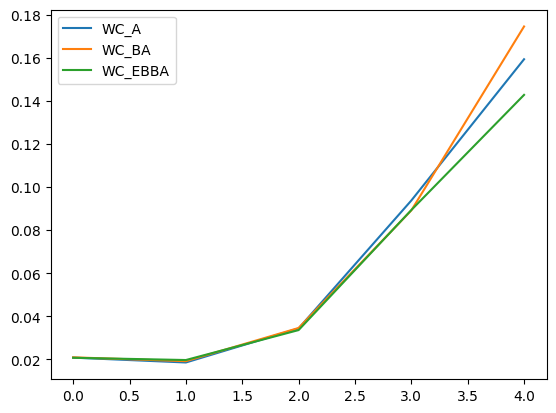

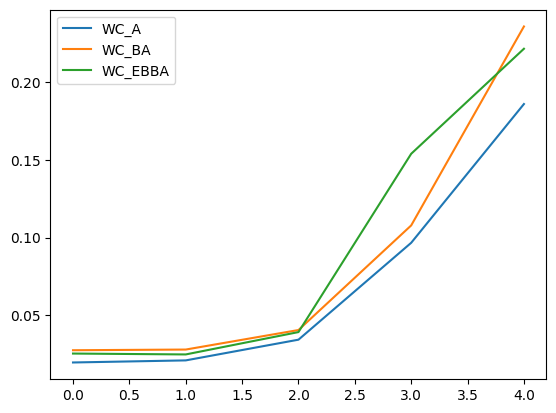

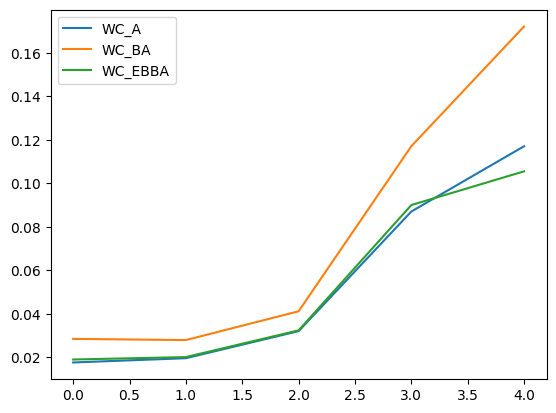

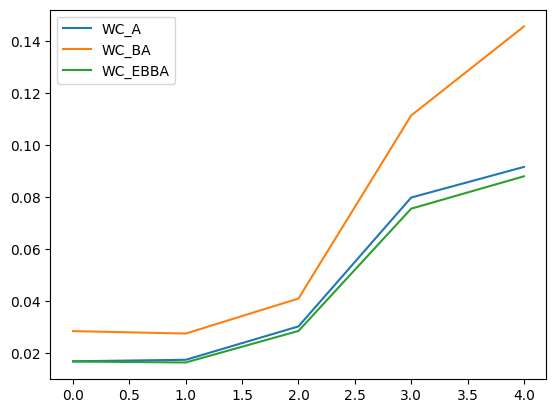

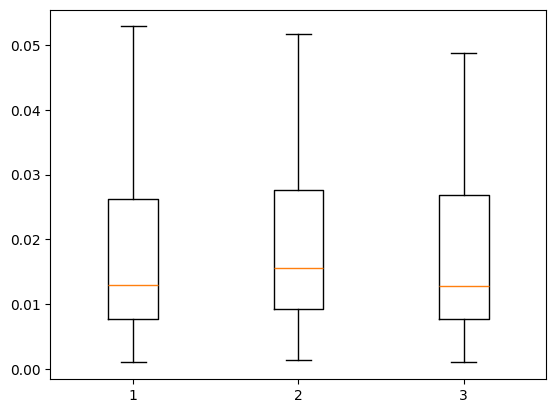

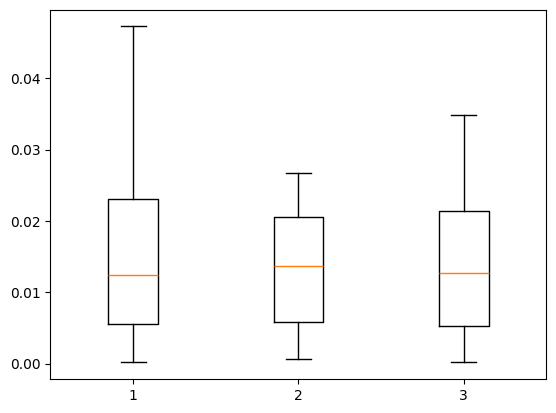

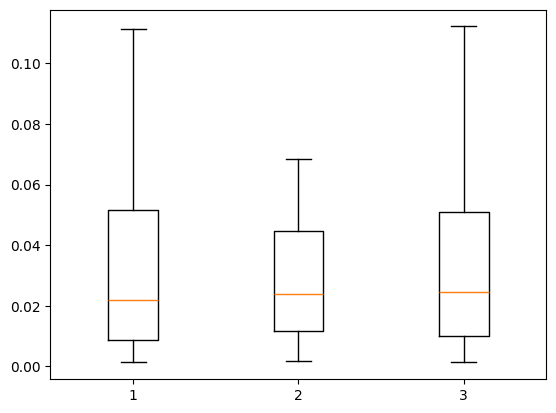

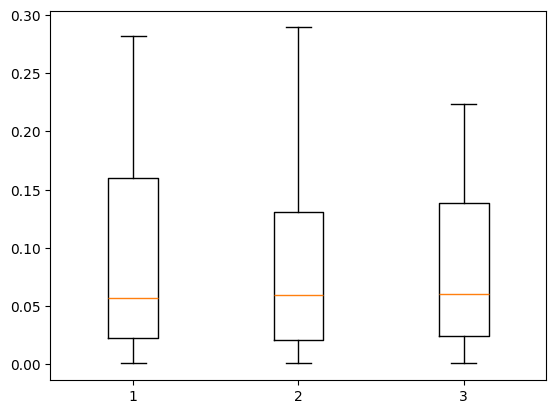

In [100]:
runtime_plot(15, True)
runtime_plot(45, True)
runtime_plot(75, True)
runtime_plot(90, True)
runtime_plot_small(15, "NY", True)
runtime_plot_small(15, "BAY", True)
runtime_plot_small(15, "COL", True)
runtime_plot_small(15, "FLA", True)

In [94]:
def malloc_plot(constraint_value, save = False):
    fig = plt.figure()
    constraint_filter = lambda constraint: constraint == str(constraint_value)

    for algorithm in algorithms:
        plot_array = []

        for roadmap in roadmaps:
            with open(f"results/{algorithm}_{roadmap}.txt", 'r') as data_file:
                runtime_data = []
                search_malloc_data = []
                
                for line in data_file.readlines()[1:]:
                    alg, queue, map_name, start_id, goal_id, constraint, min_cost1, min_cost2, budget, sol_cost1, sol_cost2, runtime, search_malloc = line.split()
                    
                    if constraint_filter(constraint):
                        runtime_data.append(float(runtime))
                        search_malloc_data.append(float(search_malloc))
            plot_array.append(sum(search_malloc_data) / len(search_malloc_data))
        
        plt.plot(plot_array, label=algorithm)

    plt.legend(loc="upper left")
    
    if save:    
        fig.savefig(f"graphs/malloc/plot-{constraint_value}.png")

def malloc_plot_small(constraint_value, save = False):
    fig = plt.figure()
    constraint_filter = lambda constraint: constraint == str(constraint_value)

    for algorithm in algorithms:
        plot_array = []

        for roadmap in roadmaps[:3]:
            with open(f"results/{algorithm}_{roadmap}.txt", 'r') as data_file:
                runtime_data = []
                search_malloc_data = []
                
                for line in data_file.readlines()[1:]:
                    alg, queue, map_name, start_id, goal_id, constraint, min_cost1, min_cost2, budget, sol_cost1, sol_cost2, runtime, search_malloc = line.split()
                    
                    if constraint_filter(constraint):
                        runtime_data.append(float(runtime))
                        search_malloc_data.append(float(search_malloc))
            plot_array.append(sum(search_malloc_data) / len(search_malloc_data))
        
        plt.plot(plot_array, label=algorithm)

    plt.legend(loc="upper left")
    
    if save:    
        fig.savefig(f"graphs/malloc/plot-small-{constraint_value}.png")

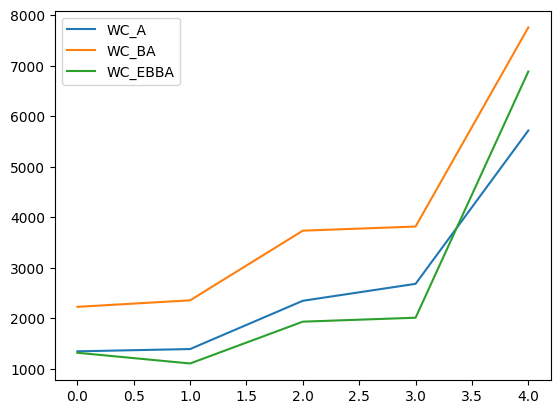

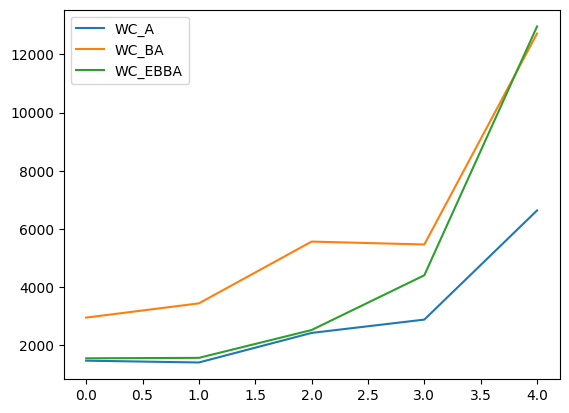

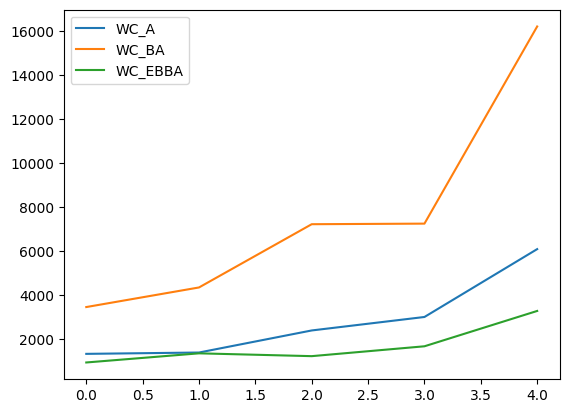

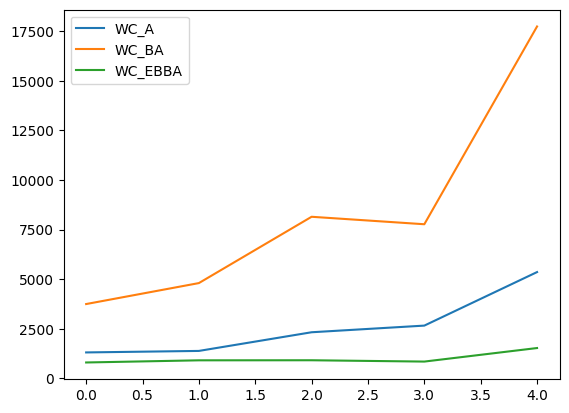

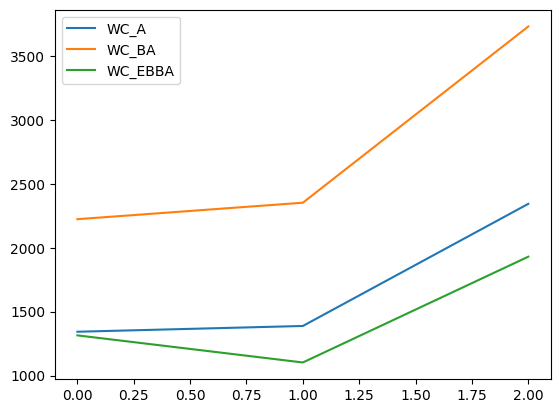

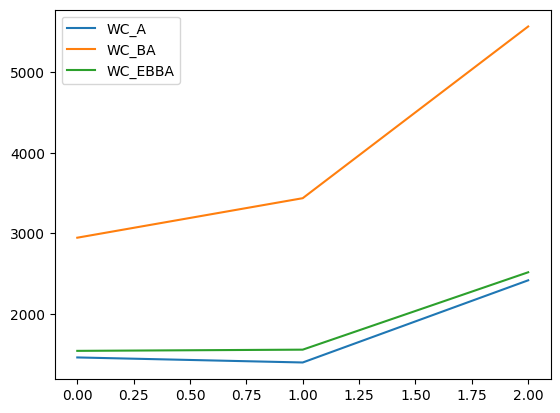

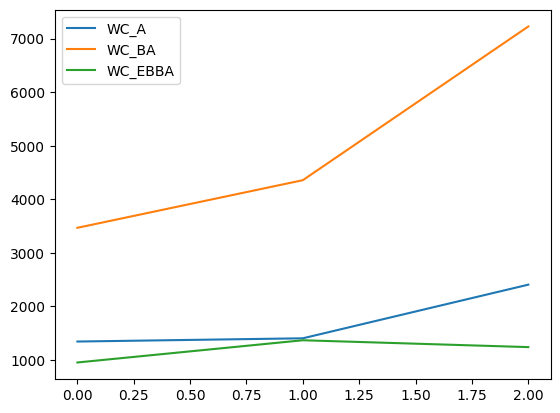

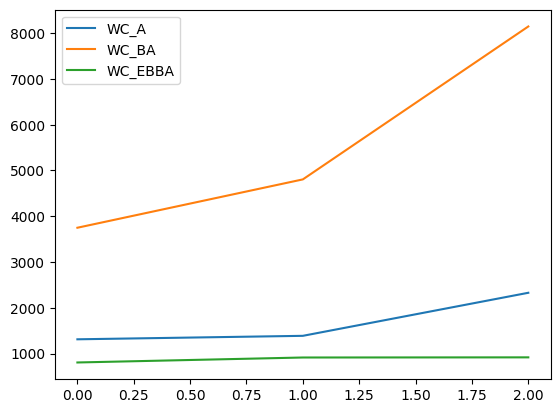

In [95]:
malloc_plot(15, True)
malloc_plot(45, True)
malloc_plot(75, True)
malloc_plot(90, True)
malloc_plot_small(15, True)
malloc_plot_small(45, True)
malloc_plot_small(75, True)
malloc_plot_small(90, True)